In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
beijing_aq_plus_met = pd.read_csv('tmp_beijing_aq_plus_met.csv.gz')
beijing_aq_plus_met.head(2)

,time,station_id,longitude,latitude,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,2014-05-01 00:00:00,1001,116.173553,40.090679,138.0,159.4,56.3,0.9,50.8,17.2,0.0,20.0,1004.0,56.0,7.92,13.0
1,2014-05-01 00:00:00,1002,116.205310,40.003950,89.0,132.9,30.5,0.8,96.5,7.6,0.0,20.0,1004.0,56.0,7.92,13.0


### Drop pressure because of too much missing data

In [4]:
beijing_aq_plus_met2 = beijing_aq_plus_met.drop(columns=['pressure','wind_direction', 'weather'])
beijing_aq_plus_met2.head(2)

,time,station_id,longitude,latitude,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,temperature,humidity,wind_speed
0,2014-05-01 00:00:00,1001,116.173553,40.090679,138.0,159.4,56.3,0.9,50.8,17.2,20.0,56.0,7.92
1,2014-05-01 00:00:00,1002,116.205310,40.003950,89.0,132.9,30.5,0.8,96.5,7.6,20.0,56.0,7.92


### Drop five stations with highest amount of missing data (update: not dropping for monthly data)

In [5]:
for station in beijing_aq_plus_met2.station_id.unique():
    tmp_df = beijing_aq_plus_met2[beijing_aq_plus_met2.station_id==station]
    print(station, tmp_df['temperature'].dropna().shape[0]/tmp_df['temperature'].shape[0])

1001 0.7998858447488585
1002 0.7998858447488585
1003 0.8480593607305936
1004 0.8469178082191781
1005 0.8614155251141552
1006 0.7998858447488585
1007 0.8204337899543379
1008 0.7998858447488585
1009 0.34178082191780823
1010 0.8469178082191781
1011 0.8469178082191781
1012 0.8204337899543379
1013 0.34178082191780823
1014 0.8204337899543379
1015 0.34178082191780823
1016 0.8469178082191781
1017 0.8634703196347032
1018 0.8634703196347032
1019 0.8410958904109589
1020 0.34178082191780823
1021 0.34178082191780823
1022 0.8204337899543379
1023 0.8389269406392694
1024 0.8430365296803652
1025 0.8638127853881279
1026 0.8598173515981735
1027 0.8289954337899543
1028 0.8589041095890411
1029 0.8539954337899544
1030 0.8430365296803652
1031 0.8539954337899544
1032 0.8589041095890411
1033 0.8598173515981735
1034 0.8410958904109589
1035 0.8634703196347032
1036 0.8614155251141552


In [9]:
beijing_aq_plus_met2["station_id"].values

array([1001, 1002, 1003, ..., 1034, 1035, 1036])

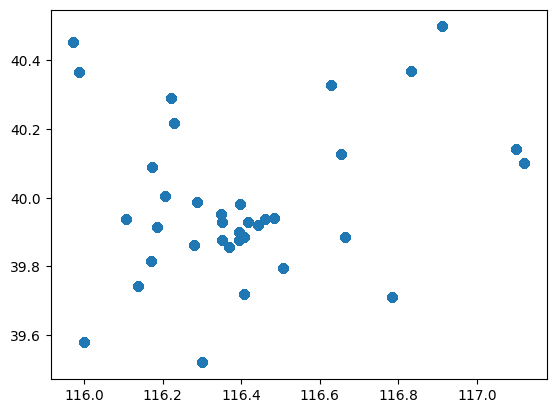

In [14]:
plt.figure()
# for f_i in beijing_aq_plus_met2["station_id"]:
plt.scatter(beijing_aq_plus_met2["longitude"], beijing_aq_plus_met2['latitude'])

#### Missing data Station IDs: (1009, 1013, 1015, 1020, 1021)

In [10]:
beijing_aq_plus_met3 = beijing_aq_plus_met2[~beijing_aq_plus_met2.station_id.isin([1001, 1009, 1013, 1015, 1020, 1021,1022])]
beijing_aq_plus_met2.station_id.unique().shape, beijing_aq_plus_met3.station_id.unique().shape

((36,), (29,))

In [11]:
beijing_aq_plus_met3.head(2)

,time,station_id,longitude,latitude,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,temperature,humidity,wind_speed
1,2014-05-01 00:00:00,1002,116.205310,40.003950,89.0,132.9,30.5,0.8,96.5,7.6,20.0,56.0,7.92
2,2014-05-01 00:00:00,1003,116.184239,39.914409,105.0,196.4,79.9,0.8,75.7,9.1,20.0,56.0,7.92


In [12]:
beijing_aq_plus_met3['time'] = pd.to_datetime(beijing_aq_plus_met3['time'])
beijing_aq_plus_met3.set_index('time', inplace=True)
colok = beijing_aq_plus_met3['2015-03-01':'2015-03-31']
for col in colok.columns:
    coldf = colok[col]
    print(col, 1 - np.round(coldf.dropna().shape[0]/coldf.shape[0], 2))

station_id 0.0
longitude 0.0
latitude 0.0
PM25_Concentration 0.030000000000000027
PM10_Concentration 0.14
NO2_Concentration 0.06000000000000005
CO_Concentration 0.030000000000000027
O3_Concentration 0.030000000000000027
SO2_Concentration 0.030000000000000027
temperature 0.14
humidity 0.13
wind_speed 0.13


### 

In [13]:
beijing_aq_plus_met3.head(2)

,station_id,longitude,latitude,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,temperature,humidity,wind_speed
time,,,,,,,,,,,,
2014-05-01,1002,116.205310,40.003950,89.0,132.9,30.5,0.8,96.5,7.6,20.0,56.0,7.92
2014-05-01,1003,116.184239,39.914409,105.0,196.4,79.9,0.8,75.7,9.1,20.0,56.0,7.92


In [17]:
beijing_aq_plus_met3.to_csv('tmp_beijing_aq_plus_met_preprocessed.csv.gz')